# Num Trades All

Not used in C2Score.

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        7556      242257      0.0000     15.0000     48.0000    182.2311    151.0000   7676.0000    426.4818 


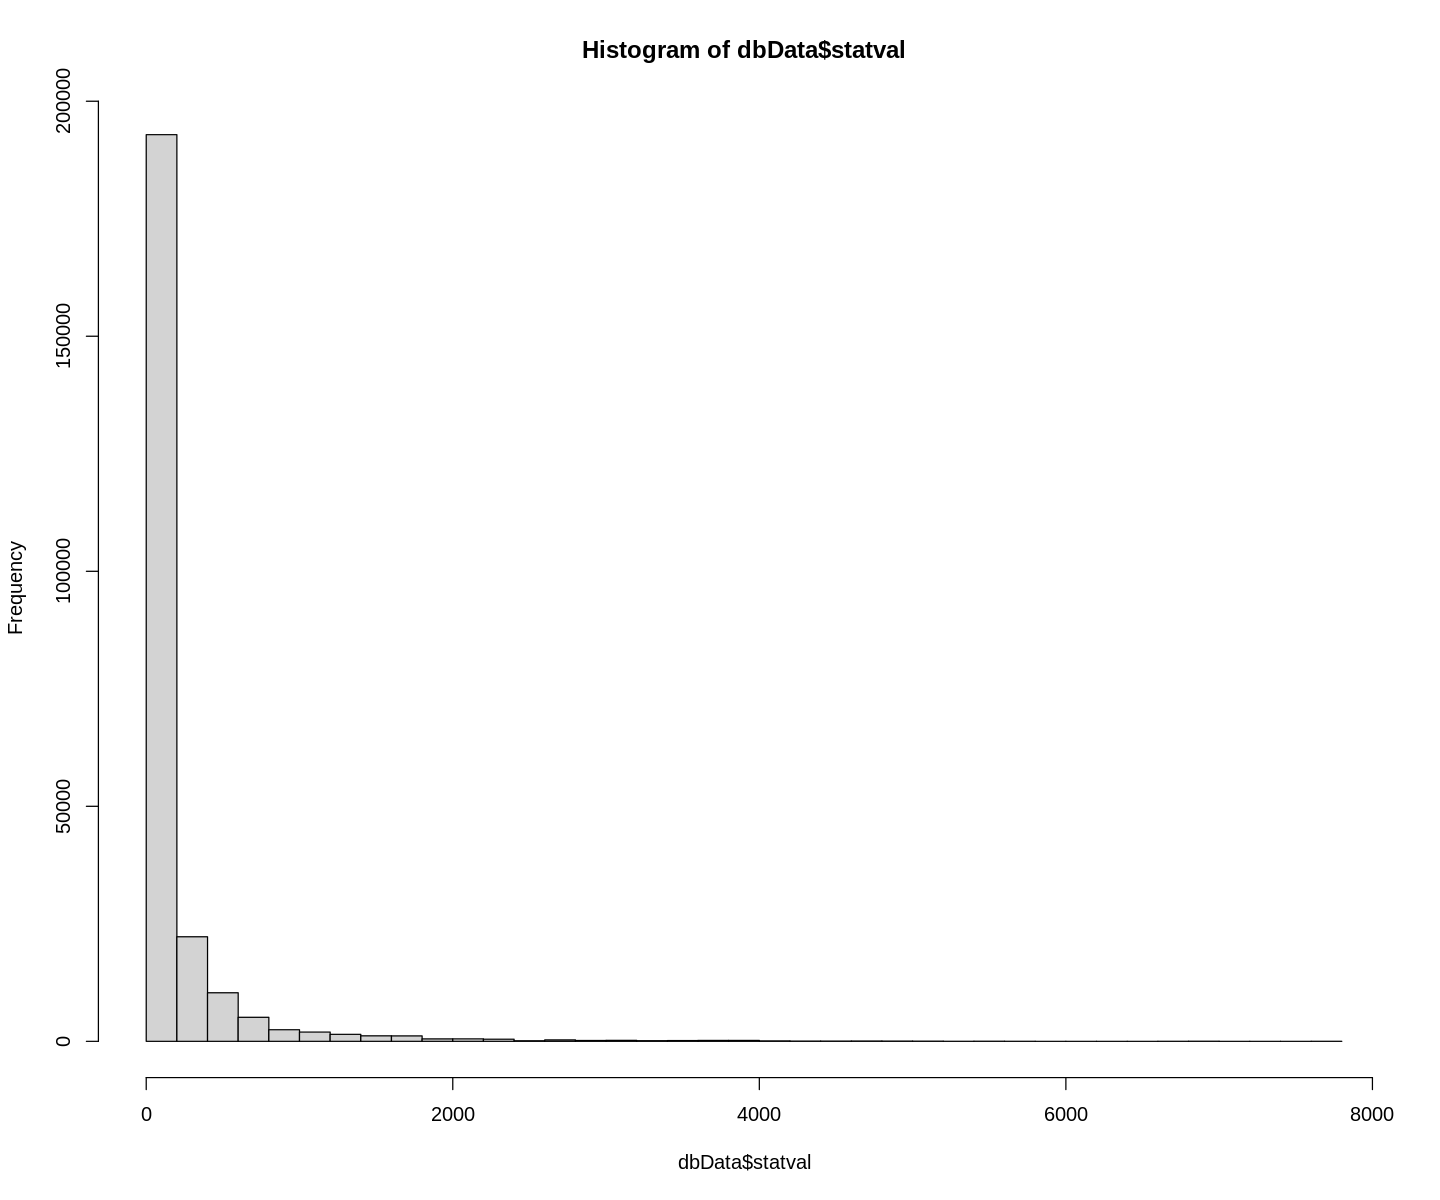

In [2]:
# What data we have.
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval from historical_stats_modern where statname='numtrades'")
overview(dbData)
hist(dbData$statval,breaks=50)

Too wide range for tabelation. Let's split data to two parts.

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        6259      190073     10.0000     27.0000     65.0000    138.5107    165.0000   1000.0000    178.5017 


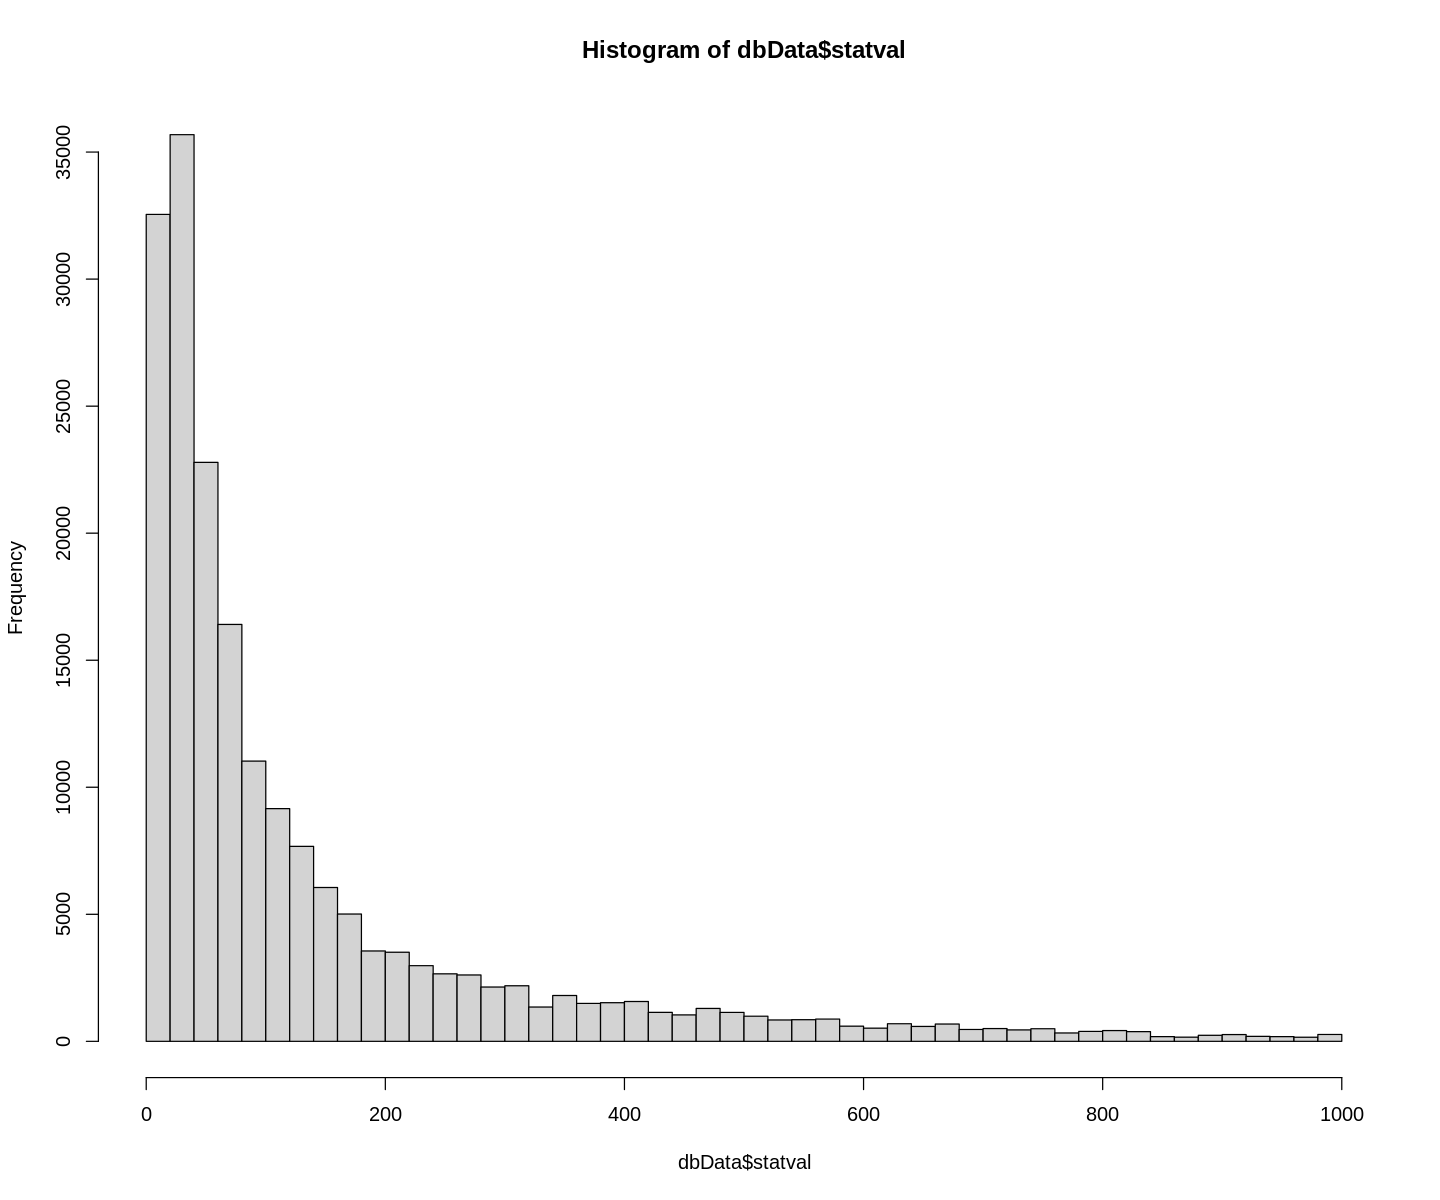

In [3]:
sql = "select systemid, YYYYMMDD, statval 
       from historical_stats_modern 
       where statname='numtrades' and statval >= 10 and statval <= 1000"
dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
         158        9208   1001.0000   1230.0000   1596.0000   1914.7174   2218.0000   7676.0000    969.0661 


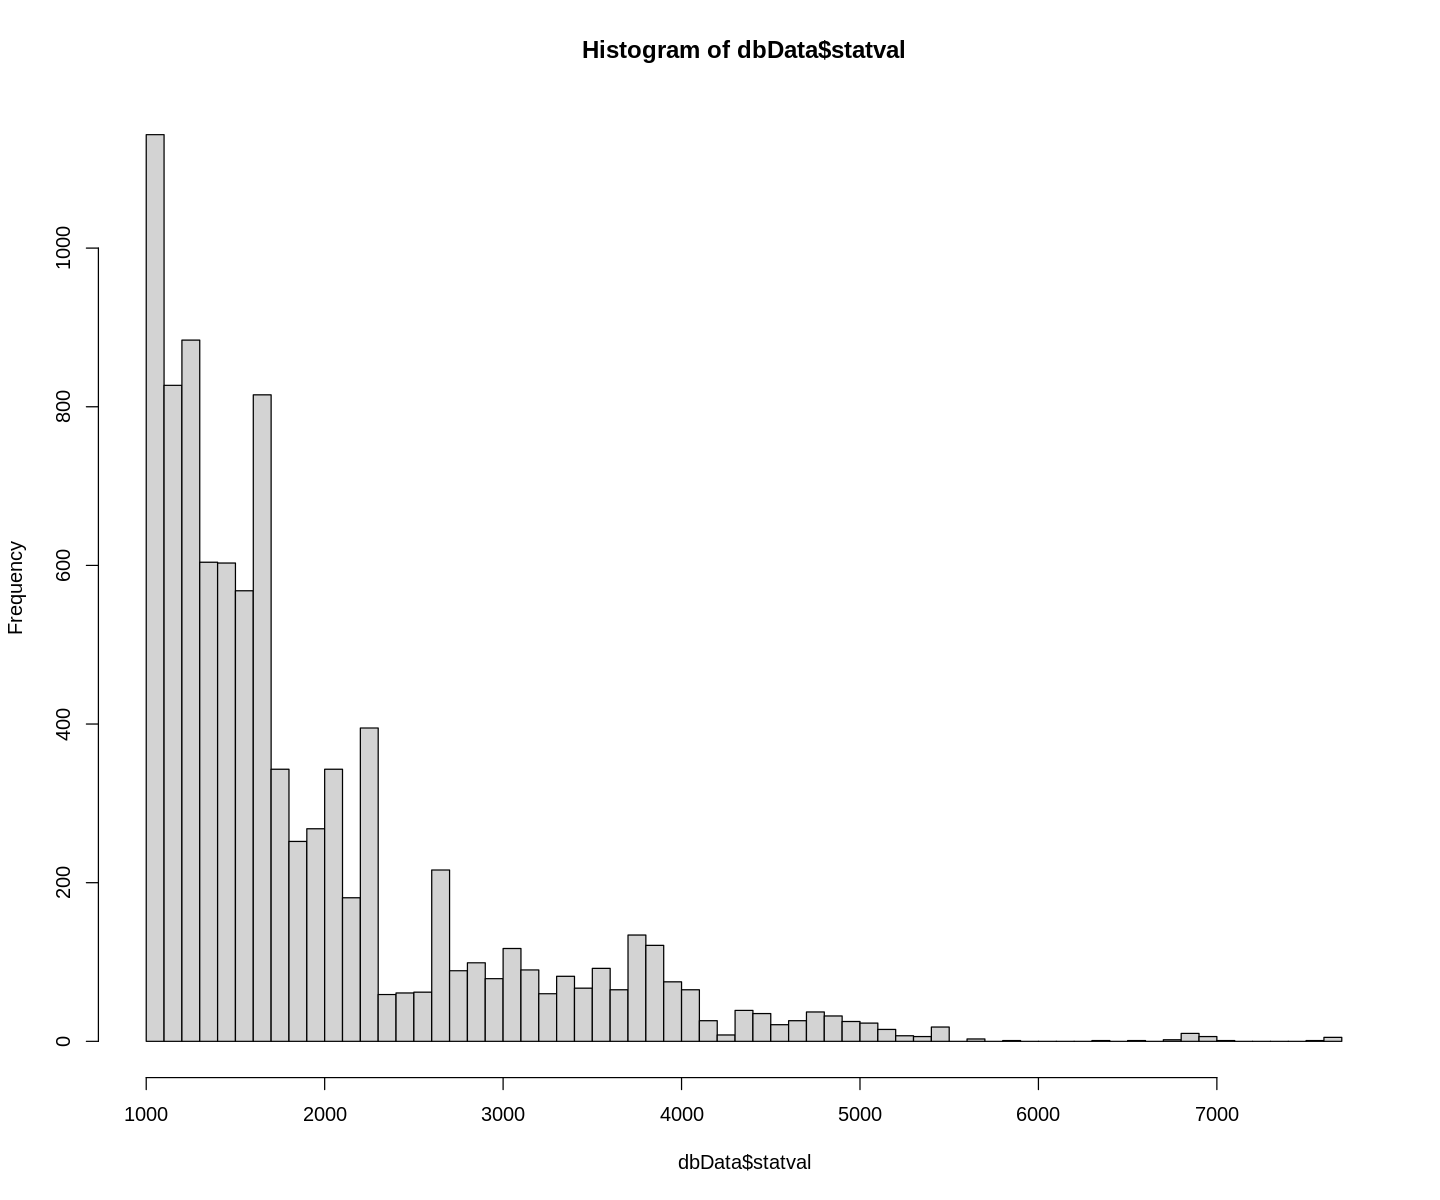

In [4]:
sql = "select systemid, YYYYMMDD, statval 
       from historical_stats_modern 
       where statname='numtrades' and statval > 1000"
dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

**Actually, there is only 20 live systems having more than 2500 trades there.**

In [5]:
# Actually, there is only 20 live systems having more than 2500 trades there.
sql = "
select max(statval) as TradesNum, systemname, systemid
 from historical_stats_modern  
 join c2systems on c2systems.guid = systemid 
 where statname='numtrades'
 and statval > 2500
 and alive = 1
 group by systemid
 order by TradesNum"
getC2ScoreDbData(sql)

TradesNum,systemname,systemid
<dbl>,<chr>,<dbl>
2547,Honey Badger,113600500
2609,Leverage3,132799626
2641,Honey Growth Fund,117390638
2648,TwistSTM2,90020687
2670,Carma Managed Futures,117442067
2912,MAZE RUNNER,116136972
3033,HYBRID CLOUD,115032656
3099,Ignite,106048331
3246,Futures DayTrade MTF,126018247


## From 10 to 1000 trades

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1764       62902     10.0000     29.0000     66.0000    133.2758    161.0000   1000.0000    170.5383 


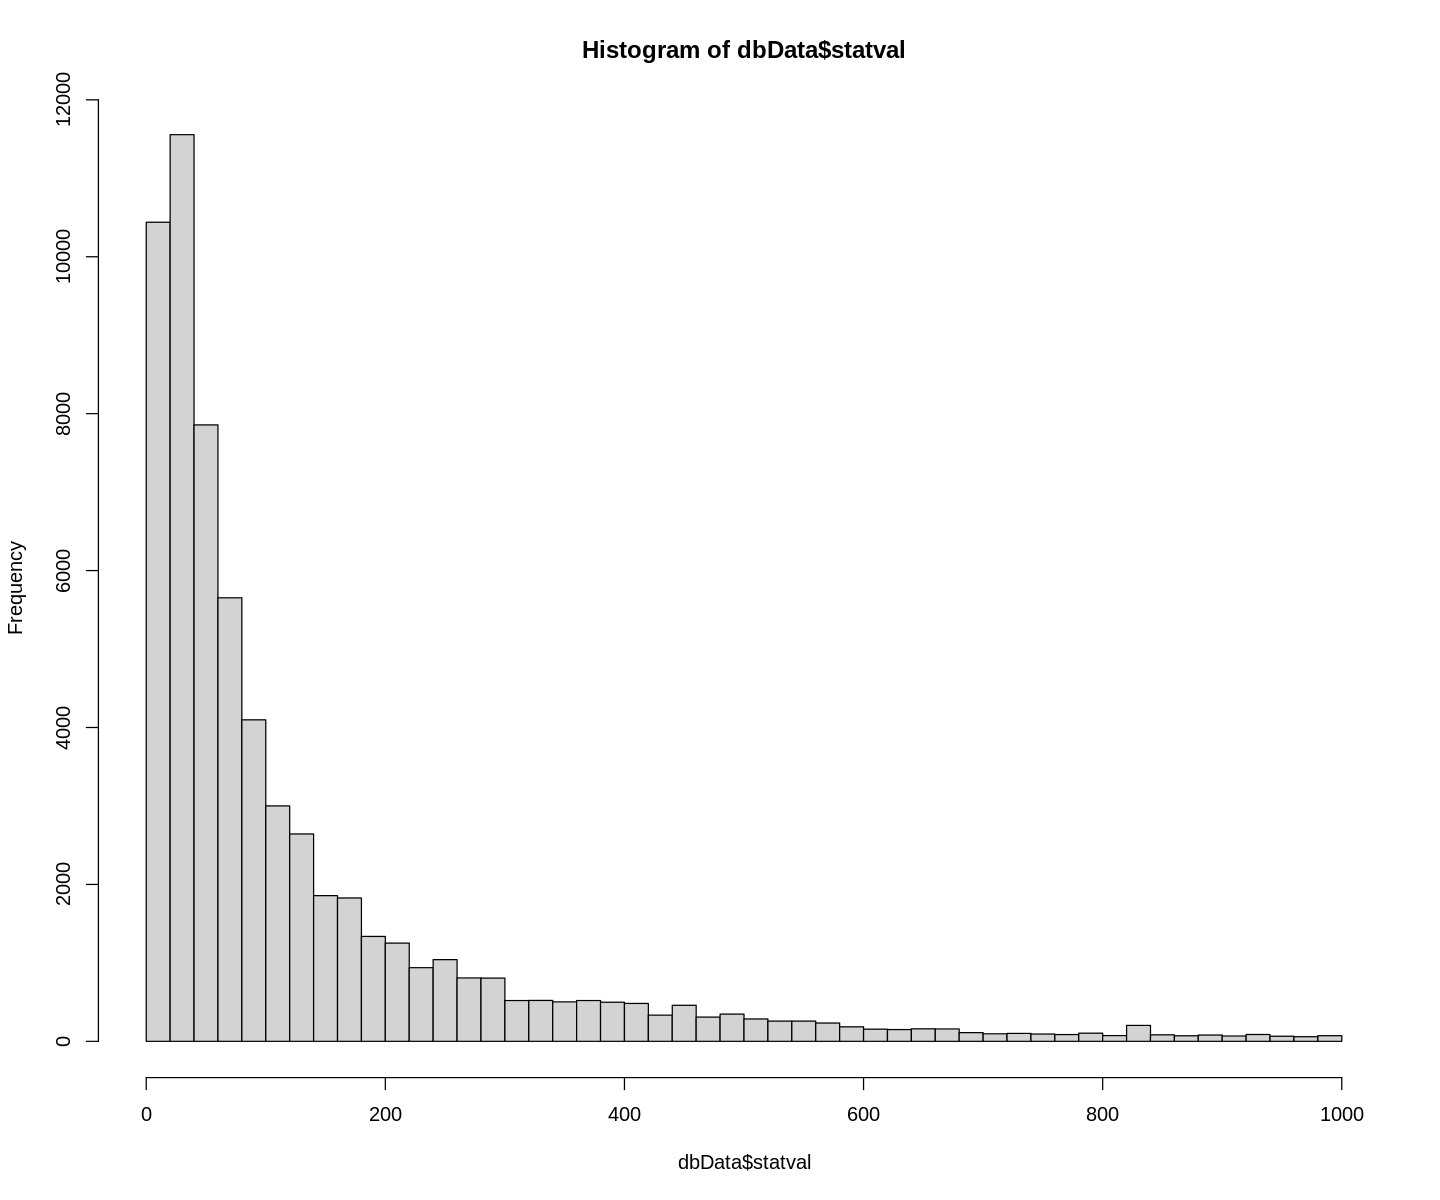

In [6]:
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where 
    statname='numtrades' 
    and statval >= 10
    and statval <= 1000"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1764       62902     10.0000     29.0000     66.0000    133.2758    161.0000   1000.0000    170.5383 



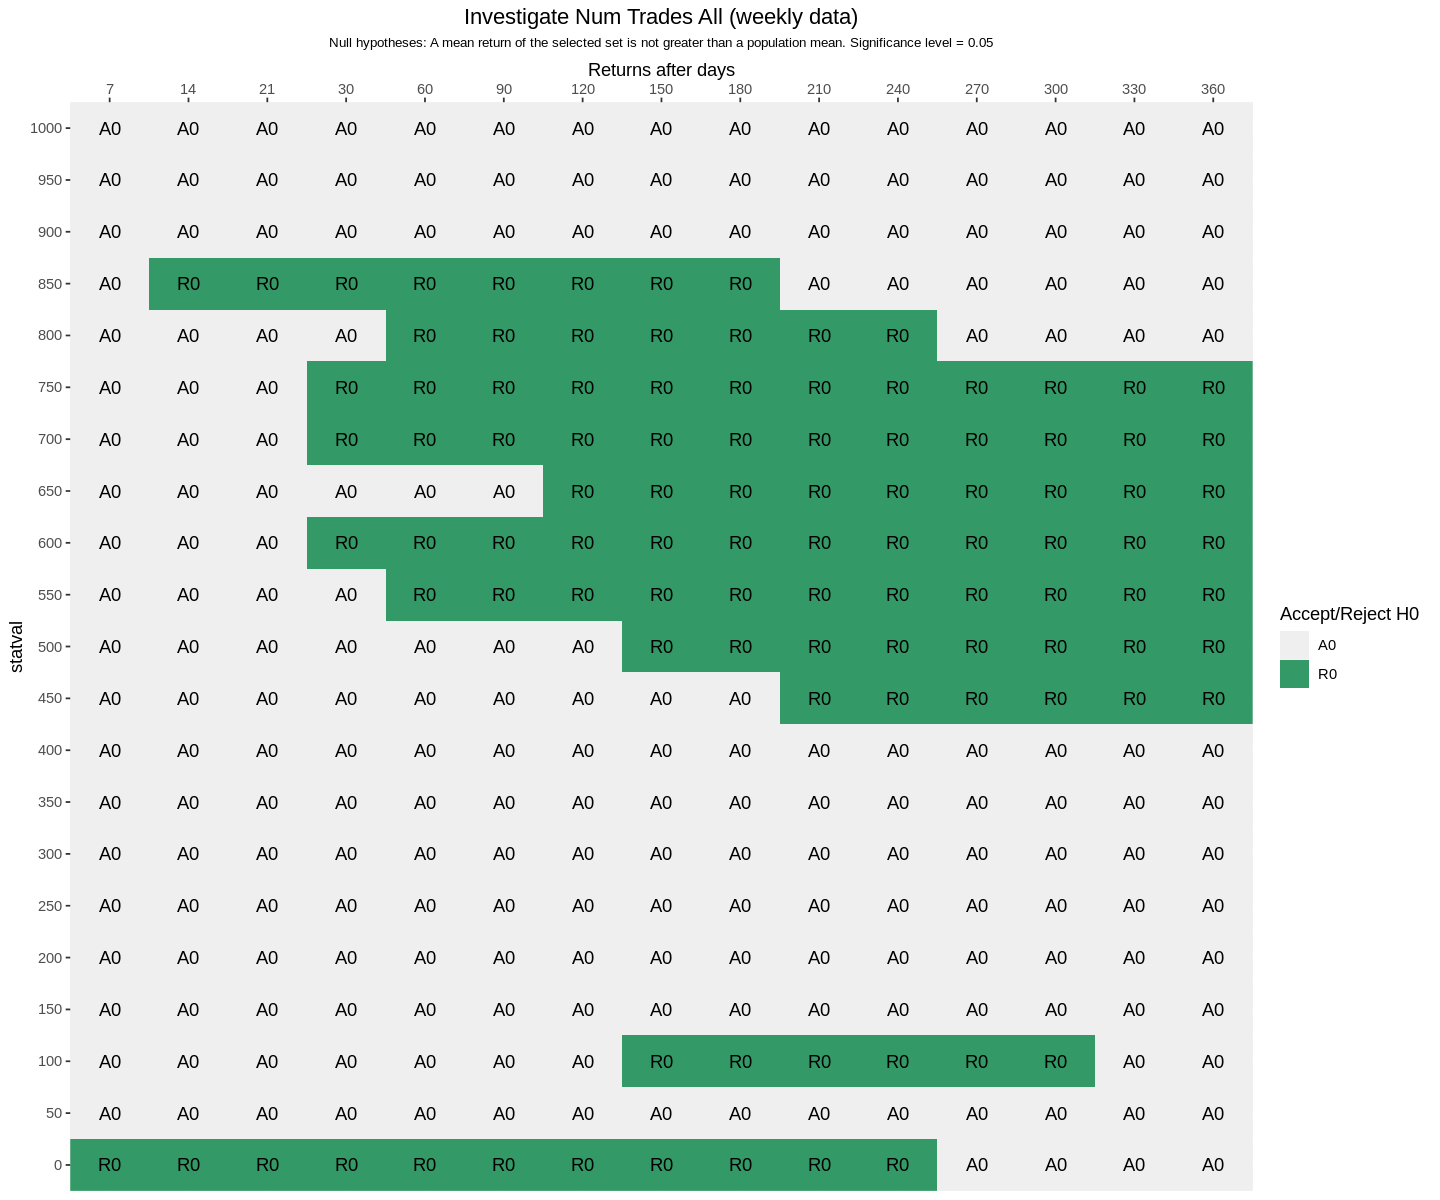

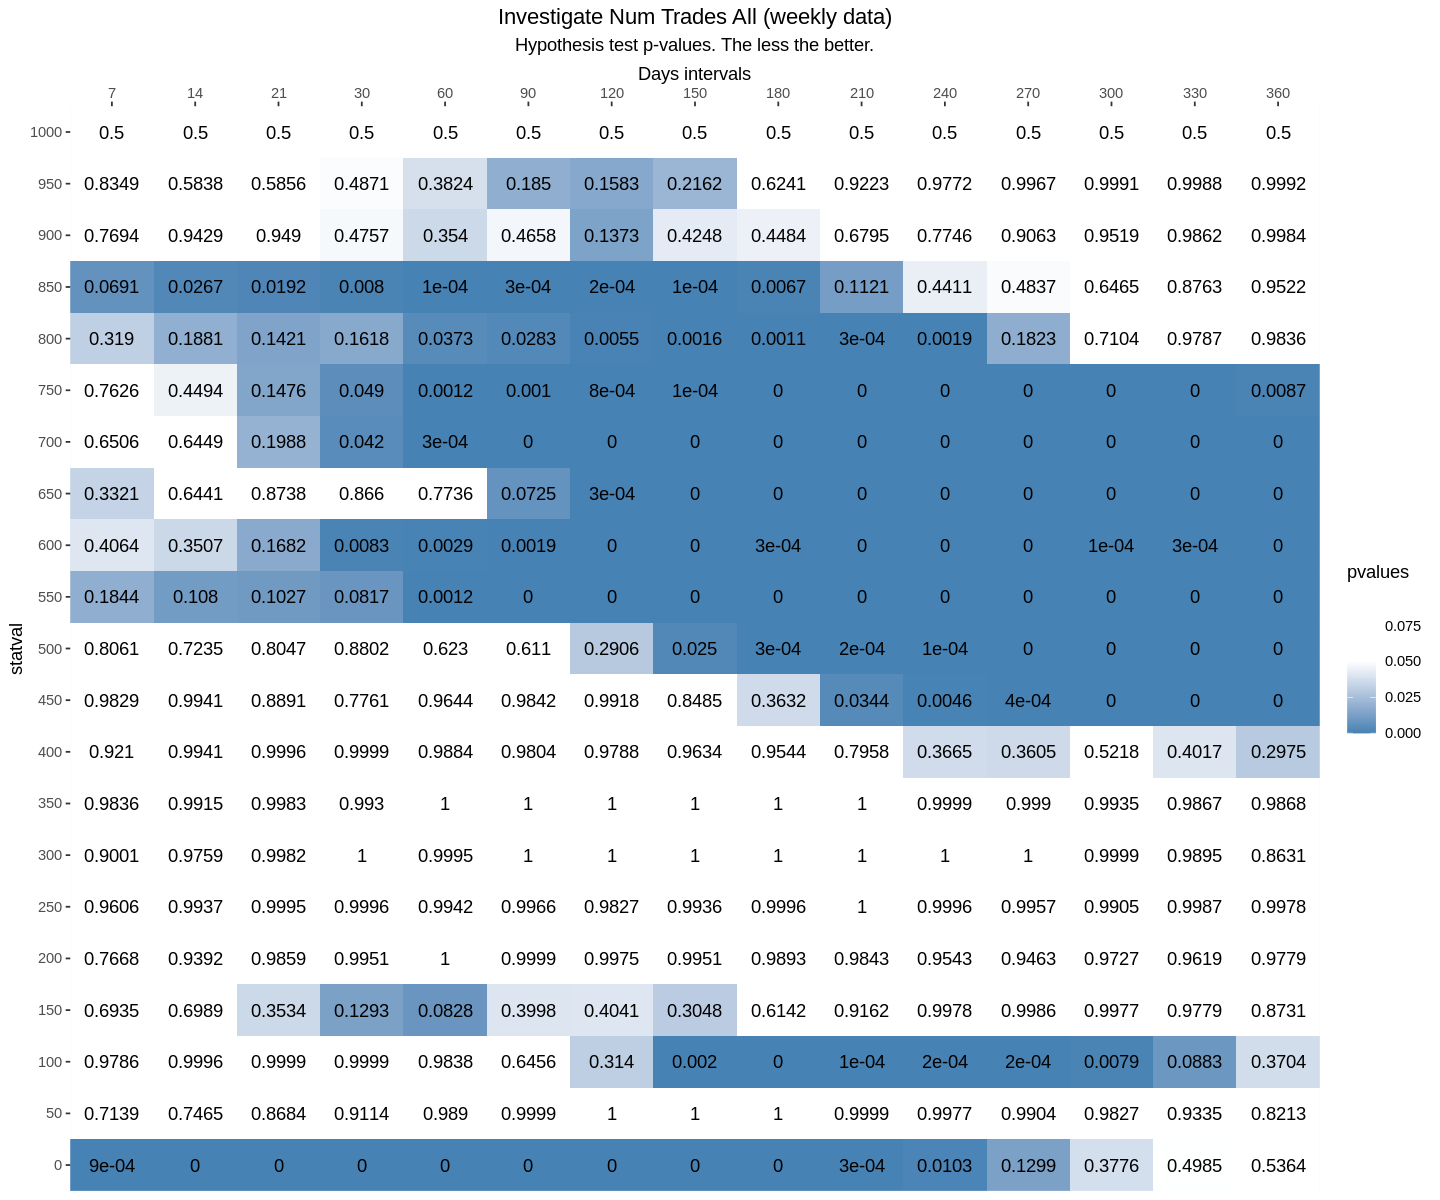

In [7]:
experiment = list(
  name = "Num Trades up to 1000",
  description = "Investigate Num Trades All (weekly data)",
  sqlText = sql, # the latest sql above
  attributeName = "statval",
  attributeSteps = seq(from = 0, to = 1000, by = 50))

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


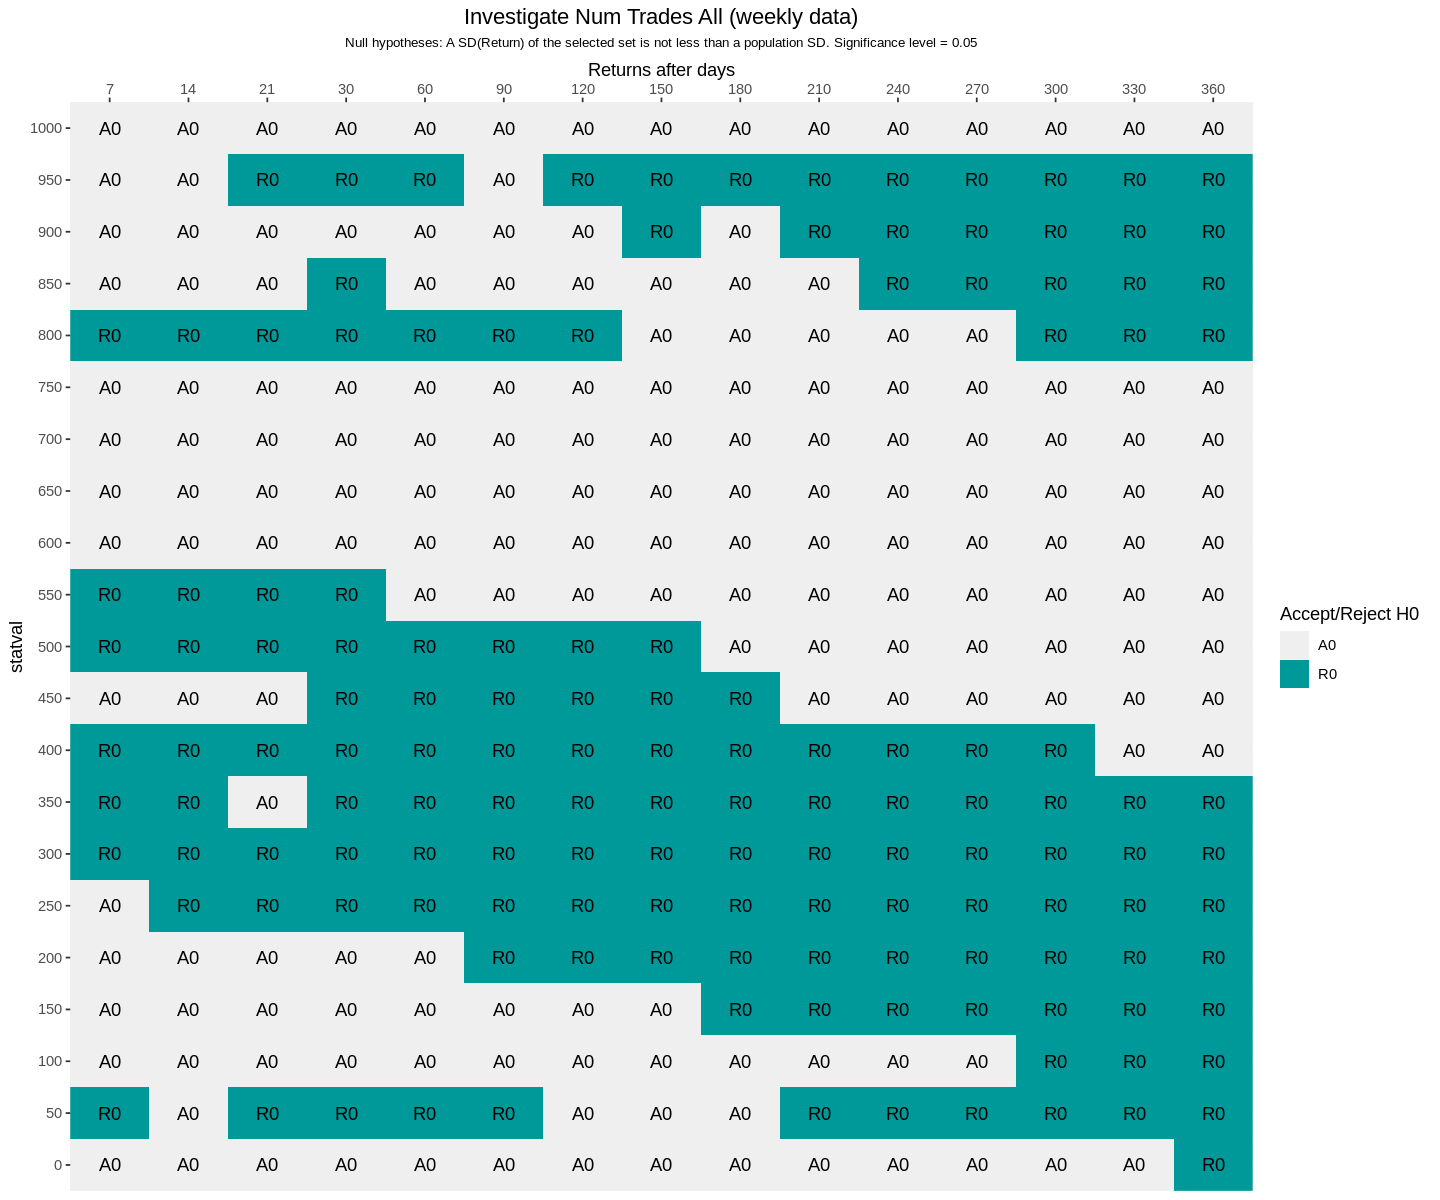

In [8]:
showSDLessHypothesisTest(experiment, result)

In [9]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
950 <= statval < 1000,150,144,141,137,128,109,101,92,88,87,85,81,75,71,70
900 <= statval < 950,184,179,171,162,139,115,101,95,84,77,75,75,73,73,67
850 <= statval < 900,190,183,177,173,164,150,125,113,103,92,83,79,77,77,76
800 <= statval < 850,310,305,300,291,264,245,221,204,186,176,162,150,135,124,118
750 <= statval < 800,225,216,207,200,176,162,149,138,125,120,112,96,93,86,78
700 <= statval < 750,234,224,217,209,180,157,147,138,125,118,116,114,98,92,80
650 <= statval < 700,340,327,312,295,237,189,165,142,129,109,91,88,86,80,76
600 <= statval < 650,373,364,355,344,313,272,229,192,156,141,135,121,105,94,90
550 <= statval < 600,513,500,488,469,410,366,327,291,259,227,196,174,158,144,131



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



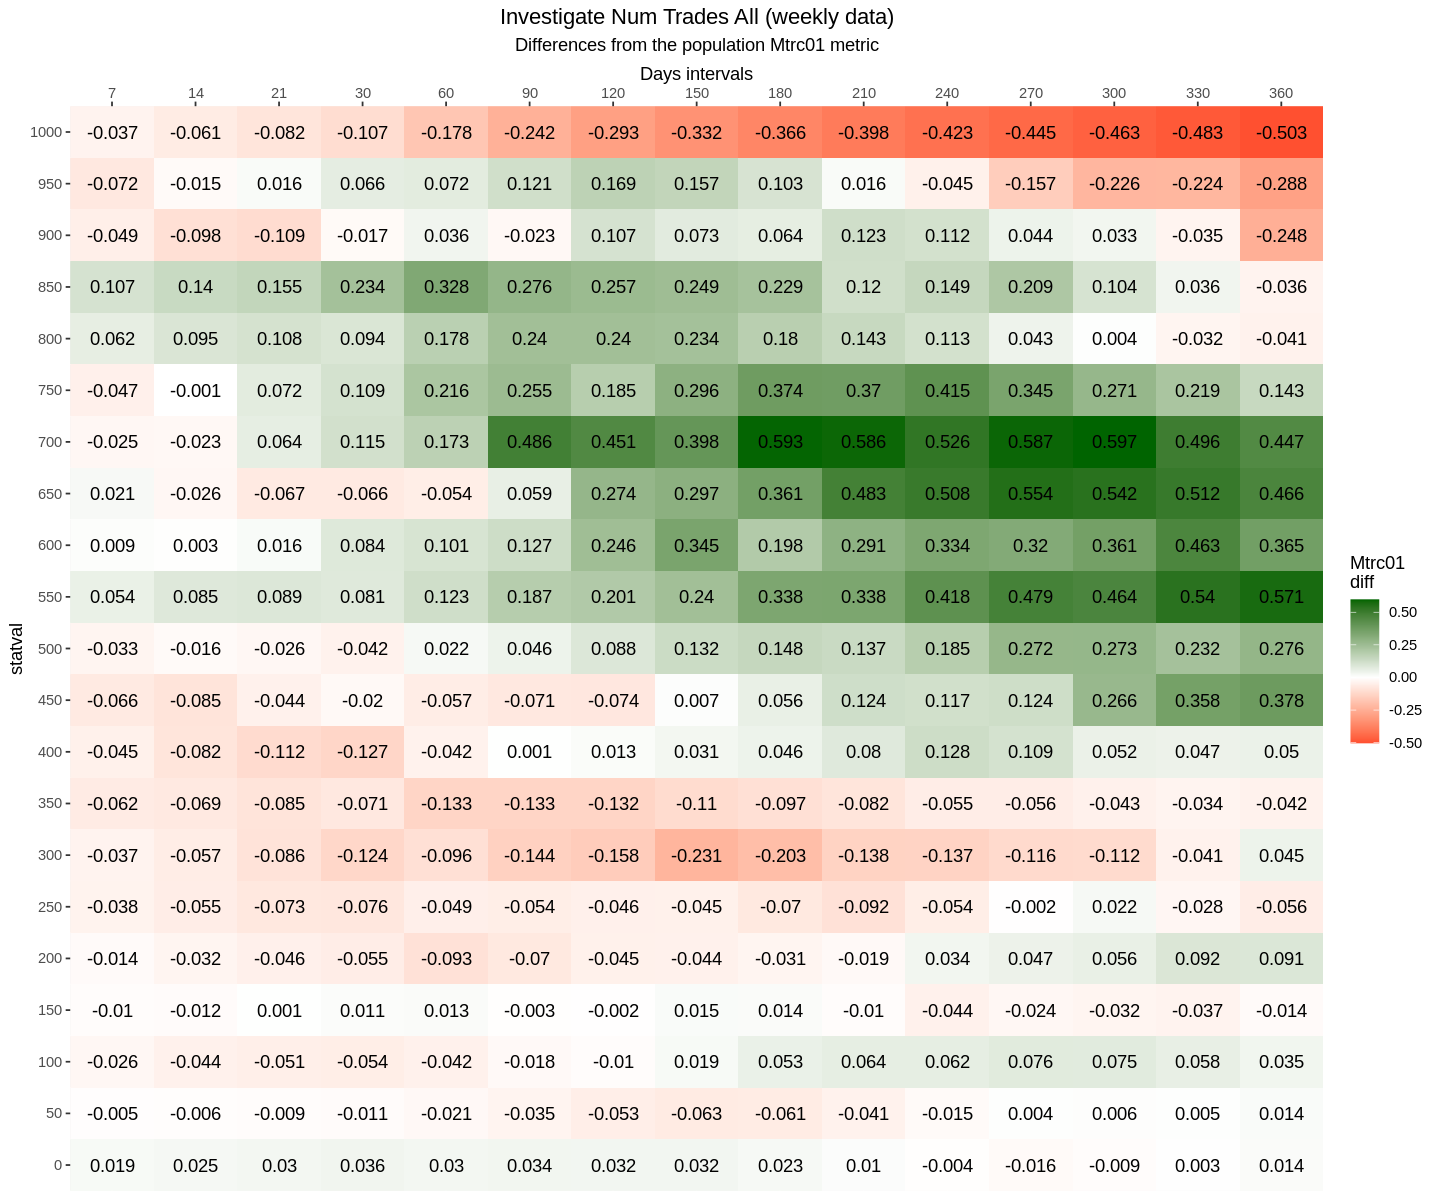

In [10]:
showMetricDifferences(experiment, result)

In [11]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
950 <= statval < 1000,38,34,33,32,31,21,20,16,15,14,13,13,12,12,11
900 <= statval < 950,47,46,44,44,39,32,24,22,19,18,16,16,14,14,12
850 <= statval < 900,50,48,44,42,37,34,28,23,20,18,15,13,12,12,11
800 <= statval < 850,56,55,55,53,44,40,30,26,24,22,20,18,17,15,14
750 <= statval < 800,59,57,53,50,43,37,31,28,24,22,21,16,16,14,14
700 <= statval < 750,69,65,63,58,49,38,35,29,25,22,21,20,17,17,15
650 <= statval < 700,80,77,74,71,60,47,38,30,29,24,20,18,18,16,15
600 <= statval < 650,89,86,82,77,64,53,45,38,32,25,23,21,19,16,16
550 <= statval < 600,100,98,96,92,76,63,55,47,39,36,29,25,22,20,19


### Discussion
 
From 10 to 1000 trades.............................

## From 1000 to 2500 trades

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
          51        2356   1000.0000   1195.0000   1396.0000   1468.1791   1684.2500   2477.0000    337.6649 


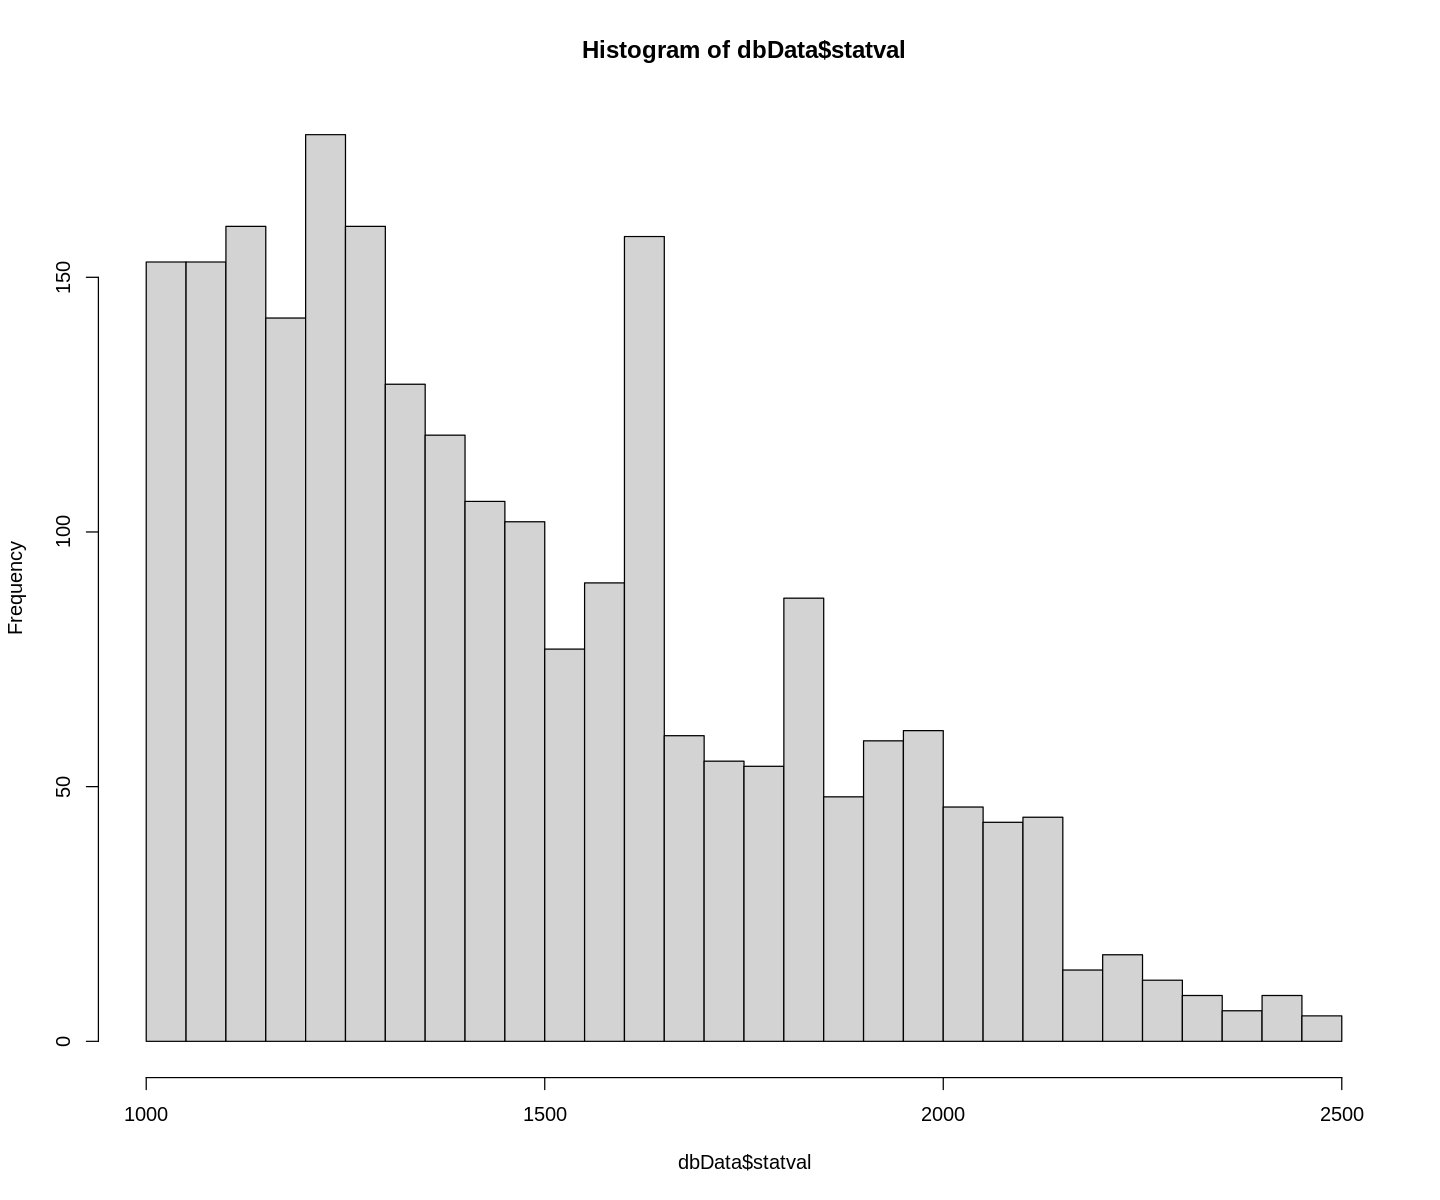

In [12]:
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where 
    statname='numtrades' 
    and statval >= 1000
    and statval <= 2500"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
          51        2356   1000.0000   1195.0000   1396.0000   1468.1791   1684.2500   2477.0000    337.6649 



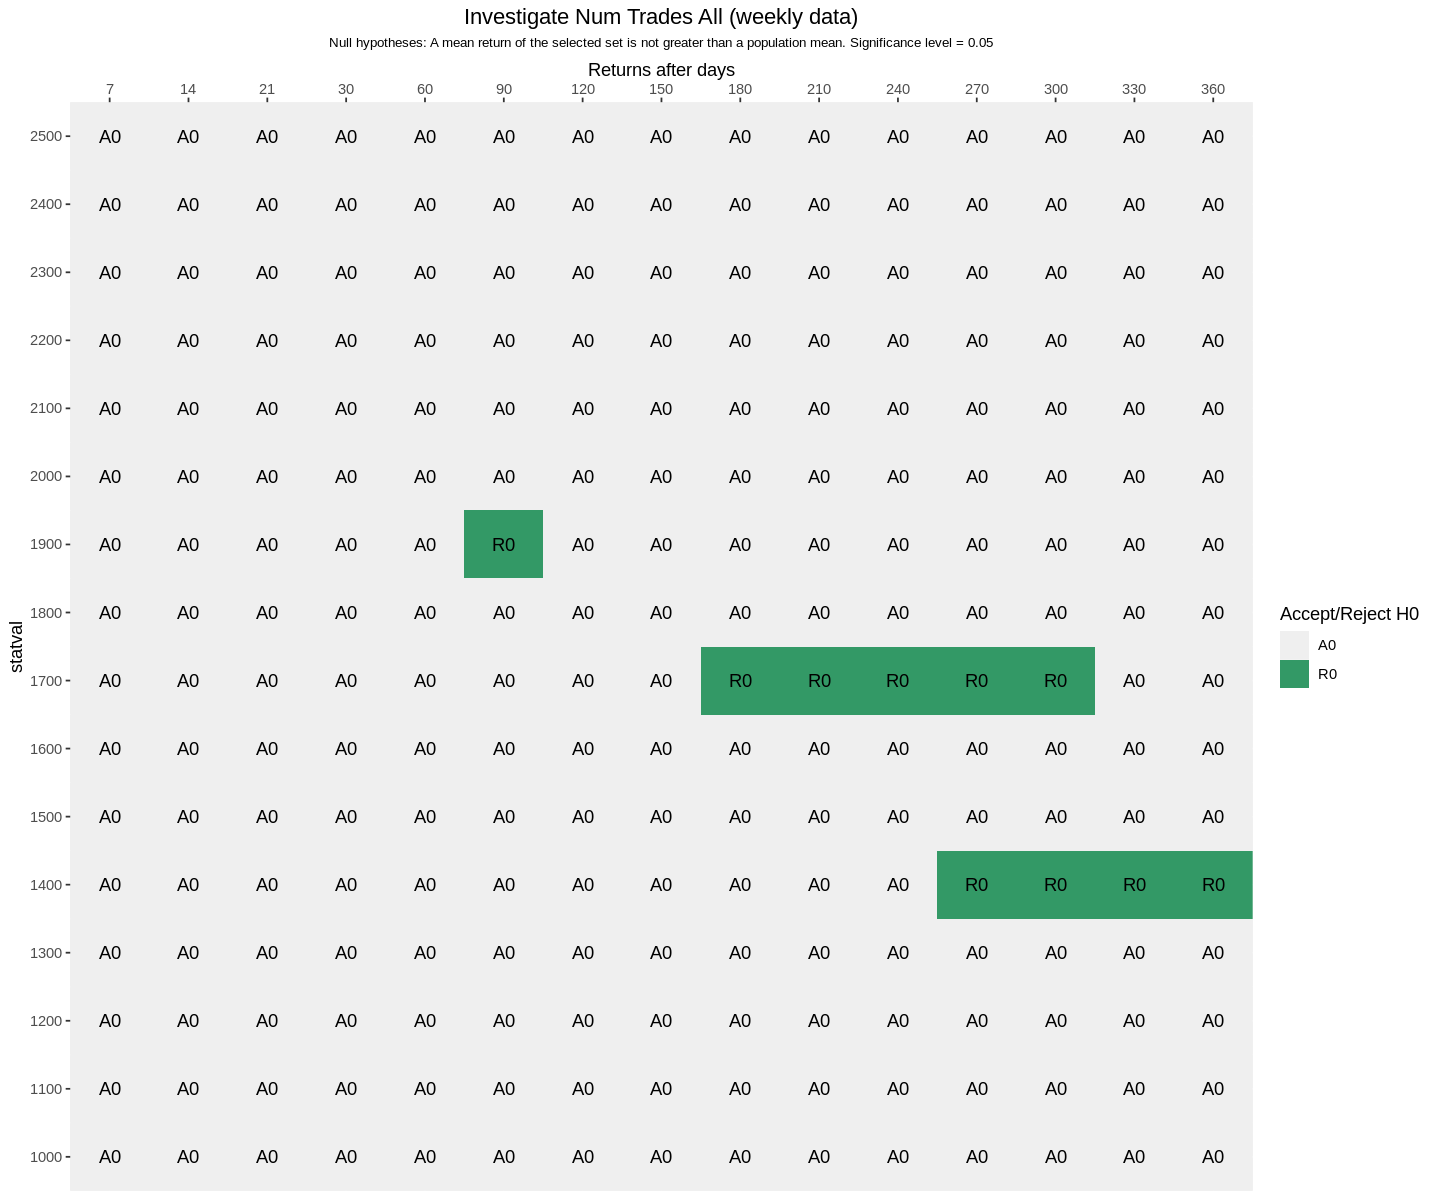

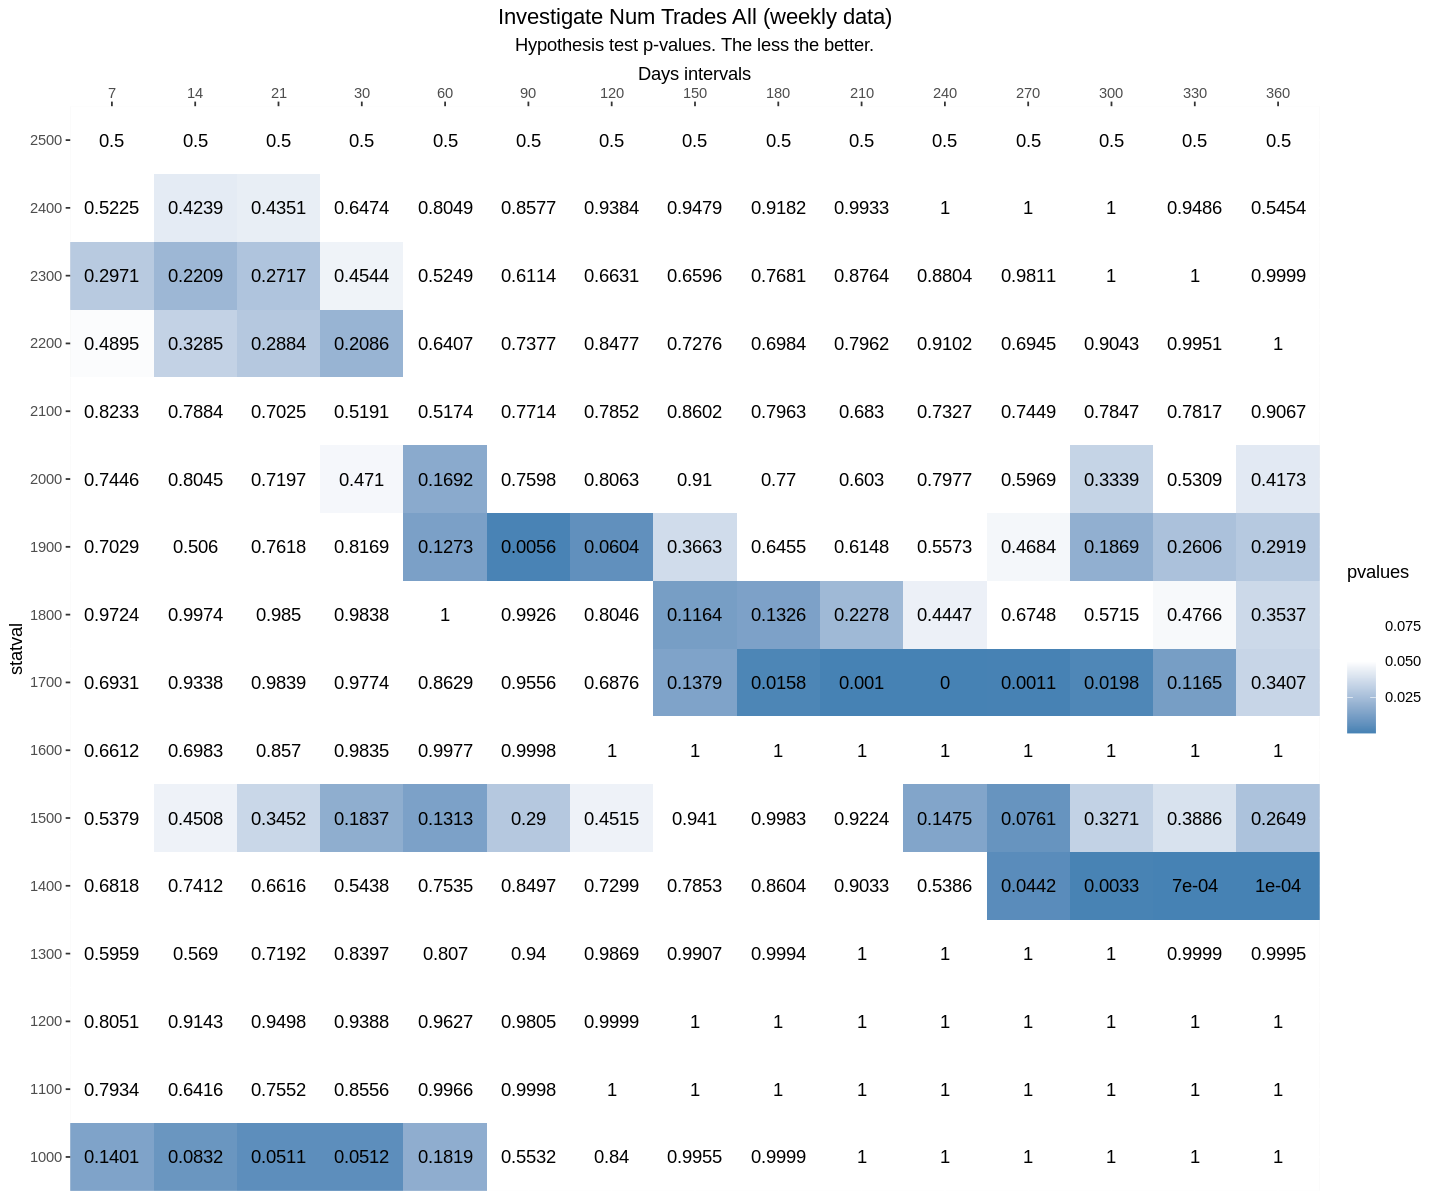

In [13]:
experiment = list(
  name = "Num Trades between 1000 and 2500",
  description = "Investigate Num Trades All (weekly data)",
  sqlText = sql, # the latest sql above
  attributeName = "statval",
  attributeSteps = seq(from = 1000, to = 2500, by = 100))

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


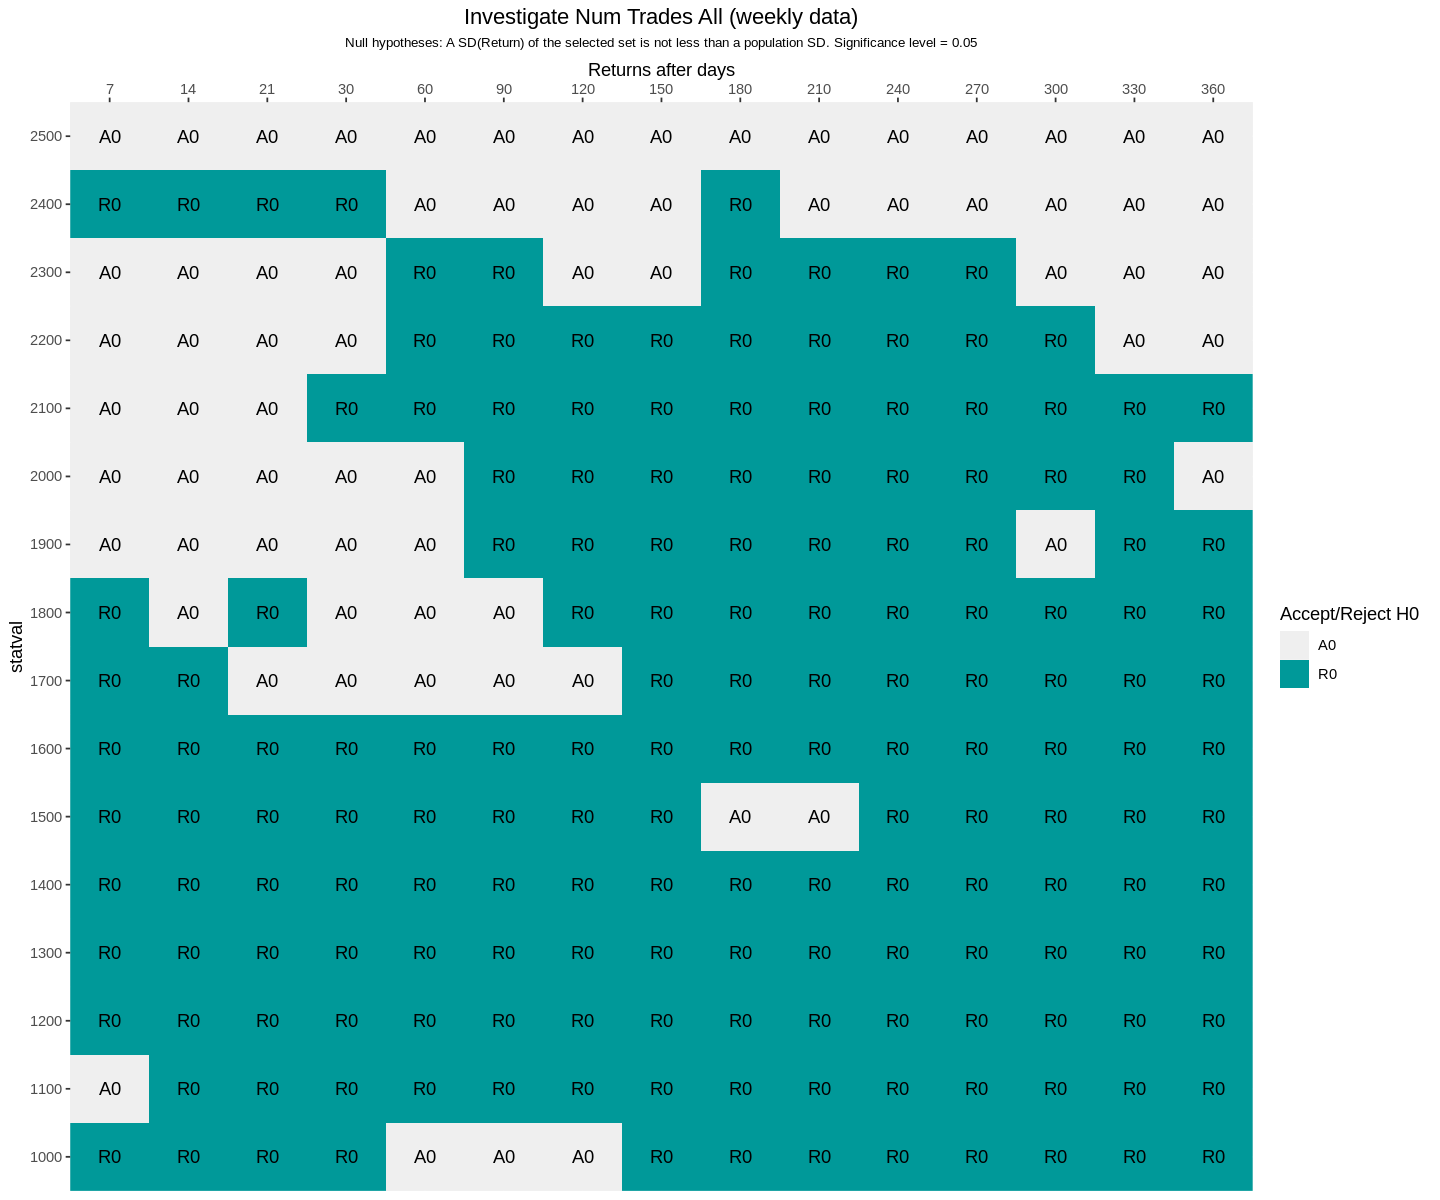

In [14]:
showSDLessHypothesisTest(experiment, result)    

In [15]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2400 <= statval < 2500,13,13,12,11,9,9,9,9,9,9,9,9,7,3,2
2300 <= statval < 2400,16,15,15,15,10,8,8,8,8,8,8,8,8,8,5
2200 <= statval < 2300,26,25,24,22,17,10,10,10,10,10,10,10,10,10,10
2100 <= statval < 2200,52,45,37,31,24,23,16,12,9,9,9,9,9,9,9
2000 <= statval < 2100,88,86,85,82,57,26,12,10,9,7,7,7,7,7,7
1900 <= statval < 2000,118,116,114,111,100,83,66,43,24,17,13,9,8,8,8
1800 <= statval < 1900,134,132,129,127,120,111,98,78,53,39,25,16,9,8,8
1700 <= statval < 1800,107,107,107,106,102,98,91,86,83,65,53,50,38,23,11
1600 <= statval < 1700,214,210,208,207,201,196,192,186,178,176,167,151,145,141,132



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



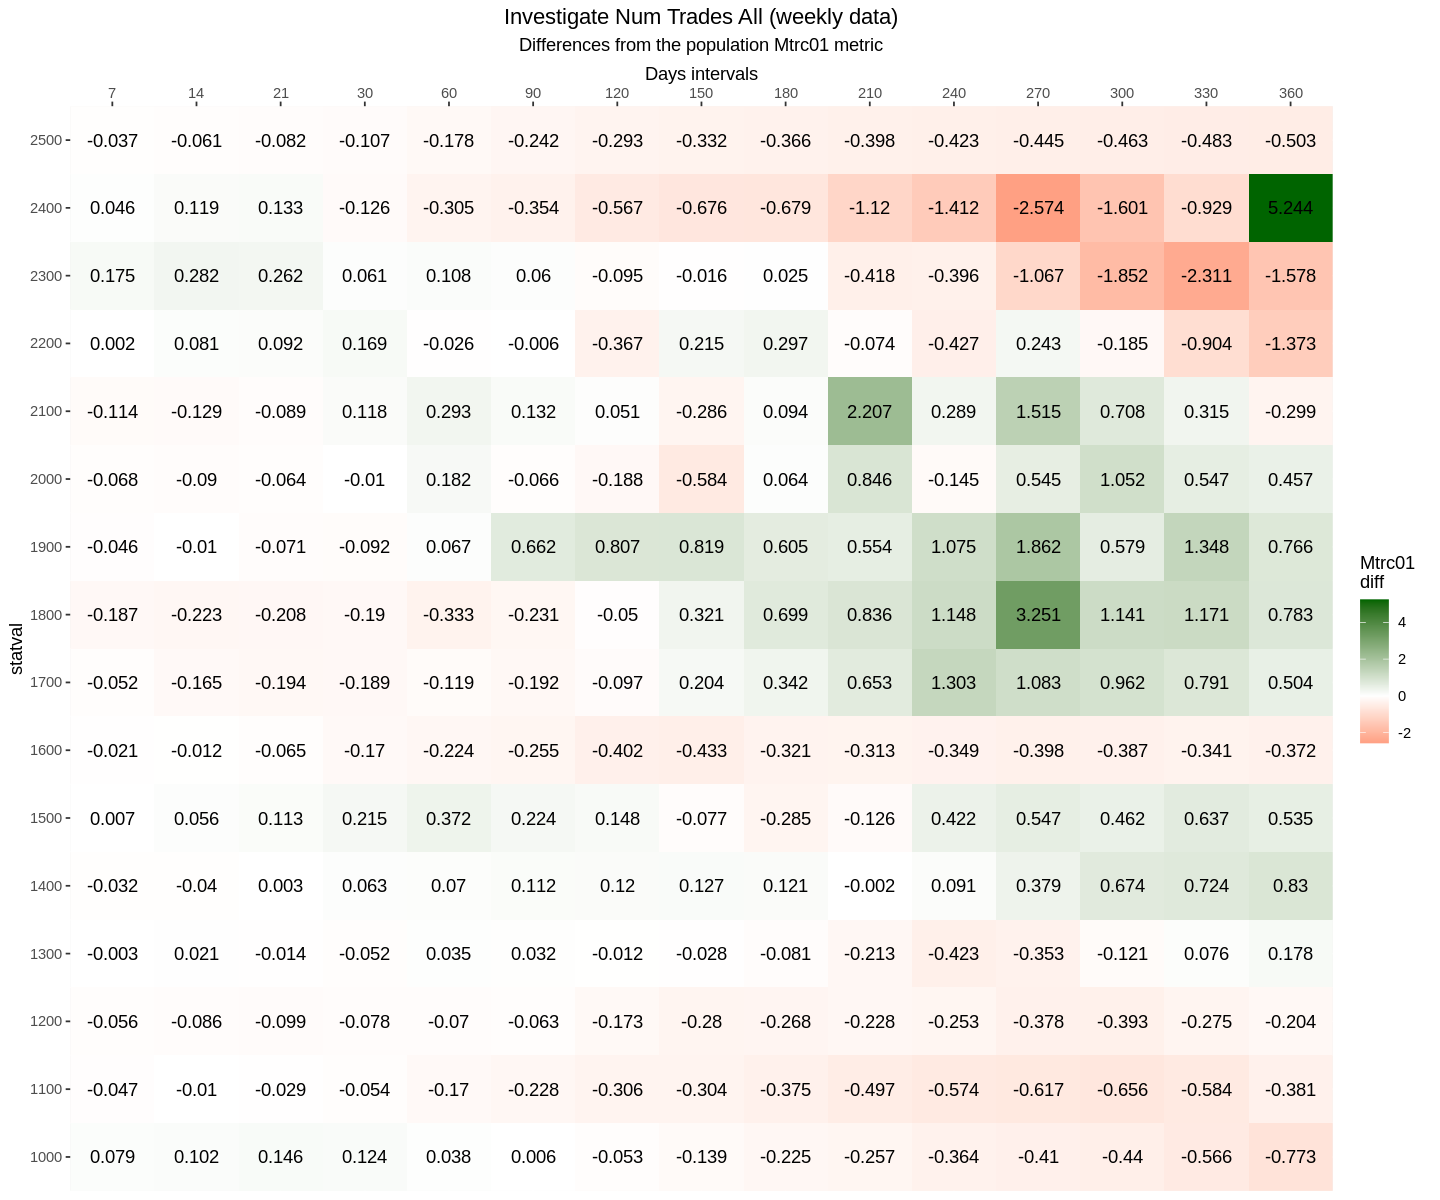

In [16]:
showMetricDifferences(experiment, result)

In [17]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2400 <= statval < 2500,4,4,4,3,2,2,2,2,2,2,2,2,2,2,1
2300 <= statval < 2400,6,5,5,5,3,2,2,2,2,2,2,2,2,2,2
2200 <= statval < 2300,5,5,5,5,4,2,2,2,2,2,2,2,2,2,2
2100 <= statval < 2200,13,13,11,7,5,4,3,3,2,2,2,2,2,2,2
2000 <= statval < 2100,15,14,14,13,12,9,5,3,3,2,2,2,2,2,2
1900 <= statval < 2000,16,15,15,15,14,11,10,7,4,3,3,3,2,2,2
1800 <= statval < 1900,19,19,18,18,16,15,14,13,8,7,6,4,3,2,2
1700 <= statval < 1800,16,16,16,15,15,15,15,13,13,12,6,6,6,6,3
1600 <= statval < 1700,22,20,19,19,17,17,17,16,14,12,11,9,7,7,6


### Discussion
 
From 1000 to 2500 trades.